In [ ]:
1. 

Consider an initial condition for which some field of interest ($\eta$, say) is a Gaussian in x.
Take the domain to be periodic, so that $\eta (x + L) = \eta(x)$ and assume the Gaussian width,
$L_G$ is small compared to $L$. That is, $\epsilon = L_G/L <<  1$. The Fourier transform of a Gaussian
is a Gaussian in wavenumber $k_x$. If we nondimensionalize so that instead of going from
$−L/2 ≤ x ≤ L/2$, we instead define a nondimensional $x$ such that $−0.5 ≤ x_n ≤ 0.5$, then
the nondimensional Gaussian width becomes $\epsilon$. It then works out that

$$\eta(x_n) = e^{-(x_n/\epsilon)^2}= \sum_{n=0}^{\infty}A_n(k) cos(2\pi kx_n)$$
Here $A_n(k) = Ae^{-(\epsilon \pi k)^2}$ where $A = (\epsilon^2 \pi)^{1/2}$
The index k is a counter i.e., $k = 0, 1, 2, 3. . . .$
The dimensional wavenumbers discussed in class correponds to $k_x = 2\pi k/L$.

Write a program to numerically sum together a large number of cosines to get a Gaussian,
such as the one above. Note that using $1000$ cosines corresponds to $2000$ points in $x$ (i.e.,
since the shortest resolved wave has a wavelength of $2\Delta x$). Thus, for example, if $\epsilon = 0.025$,
then the (half) Gaussian is resolved by about 25 grid points.

Next, assume a dispersion relation and replot the sum of all of these cosines at a later
time when the phases of all the cosines has been shifted by an amount $ −\omega(k_x)t$. Do this
for the following cases:

(a) Poincarre waves: Take $L = 4\times 10^{6}m$, $L_d = L_G$, with $\epsilon= 0.025$ (so that both
the Gaussian width and $L_d$ correspond to $100 km$). Assume $f = 10^{−4}$ and recall
that $c = f\times L_d$. Further assume the waves to be travelling to the right, i.e., so that
$\omega = +(c^2k^2_x + f^2)^{1/2}$
. Plot results for different times, e.g., 1 day, 5 days, etc

Take the Poincarre wave plots you produced in problem number one were for η. Plot the
corresponding u and v fields.

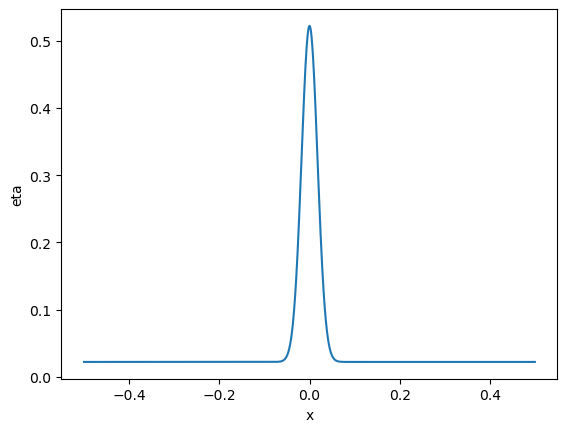

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
epsilon = 0.025  # Gaussian width
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)
dx = x[1] - x[0]

# Calculate the A_n coefficients
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)

# Calculate the Fourier series
eta = np.zeros_like(x)
for i in range(n_cosines):
    eta += A_n[i] * np.cos(2 * np.pi * k[i] * x)

# Plot the results
plt.plot(x, eta)
plt.xlabel('x')
plt.ylabel('eta')
plt.show()


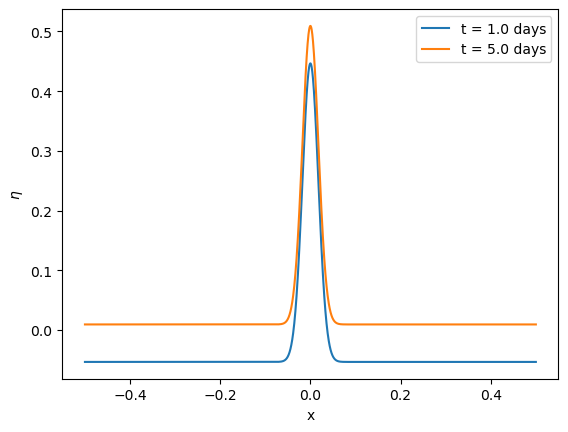

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
epsilon = 0.025 # Gaussian width
N = 1000 # Number of cosines to sum
L = 4e6 # Period of domain
L_d = epsilon * L # Rossby deformation radius
f = 1e-4 # Coriolis parameter
c = f * L_d # Rossby wave speed

# Define nondimensional x and t grids
x_n = np.linspace(-0.5, 0.5, num=2000, endpoint=True)
t_n = np.array([1,5]) * 86400 # Times in seconds

# Sum cosines to get initial Gaussian
A = np.sqrt(epsilon**2 * np.pi)
eta = np.zeros_like(x_n)
for k in range(N):
    A_n = A * np.exp(-(epsilon * np.pi * k)**2)
    eta += A_n * np.cos(2 * np.pi * k * x_n)

# Loop over times and update phases
for t in t_n:
    omega = np.sqrt((c**2 * (2 * np.pi * np.fft.fftfreq(len(x_n), d=x_n[1]-x_n[0]))**2 + f**2))
    phase = -omega * t
    eta_t = np.fft.ifft(np.fft.fft(eta) * np.exp(1j * phase))
    eta_t = np.real(eta_t)

    # Plot result
    plt.plot(x_n, eta_t, label='t = {} days'.format(t/86400))

# Add legend and labels
plt.legend()
plt.xlabel('x')
plt.ylabel('$\eta$')
plt.show()


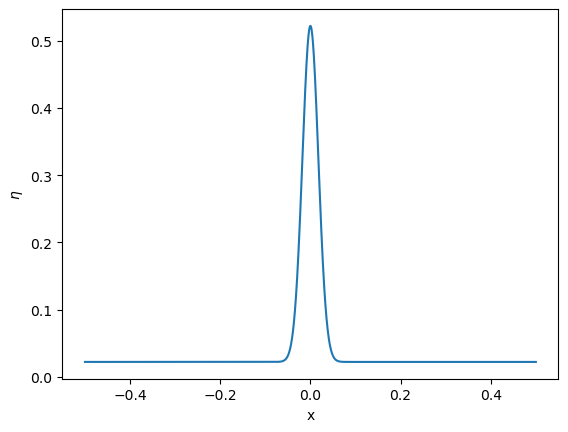

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
epsilon = 0.025 # Gaussian width
N = 1000 # Number of cosines to sum
L = 1.0 # Period of domain
A = np.sqrt(epsilon**2 * np.pi) # Amplitude of each cosine

# Define nondimensional x grid
x_n = np.linspace(-0.5, 0.5, num=2000, endpoint=True)

# Sum cosines to get Gaussian
eta = np.zeros_like(x_n)
for k in range(N):
    A_n = A * np.exp(-(epsilon * np.pi * k)**2)
    eta += A_n * np.cos(2 * np.pi * k * x_n)

# Plot Gaussian
plt.plot(x_n, eta)
plt.xlabel('x')
plt.ylabel('$\eta$')
plt.show()

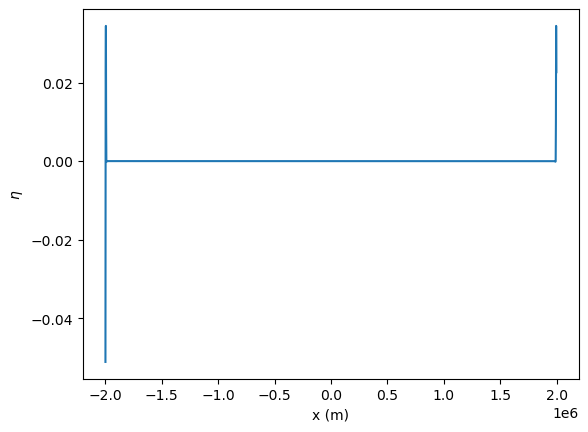

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 4e6   # length of domain
Ld = L * 0.025   # Rossby deformation radius
epsilon = 0.025   # Gaussian width
f = 1e-4   # Coriolis parameter

# Grid
N = 2000   # number of grid points
x = np.linspace(-0.5, 0.5, N, endpoint=False)
dx = x[1] - x[0]
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi

# Amplitudes
A = np.sqrt(epsilon**2 * np.pi)
An = A * np.exp(-(epsilon * np.pi * k)**2)

# Gaussian field
eta = np.sum(An * np.cos(2*np.pi*np.outer(k, x)), axis=0)

# Plot Gaussian
plt.plot(x*L, eta)
plt.xlabel('x (m)')
plt.ylabel('$\eta$')
plt.show()


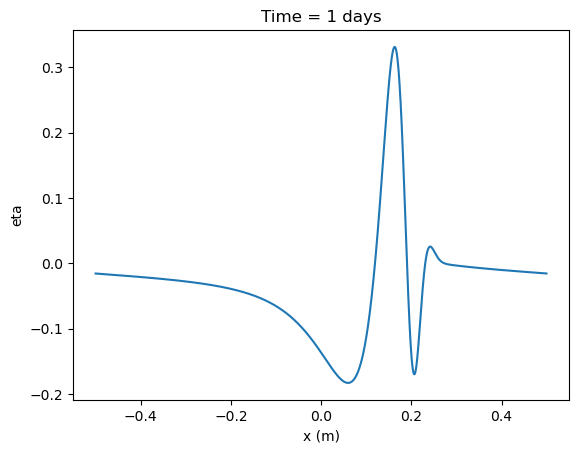

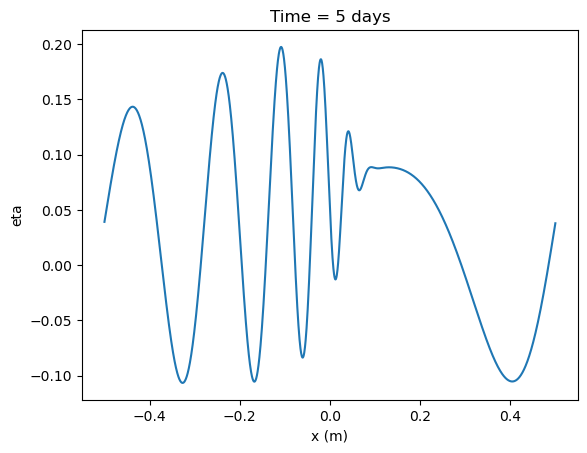

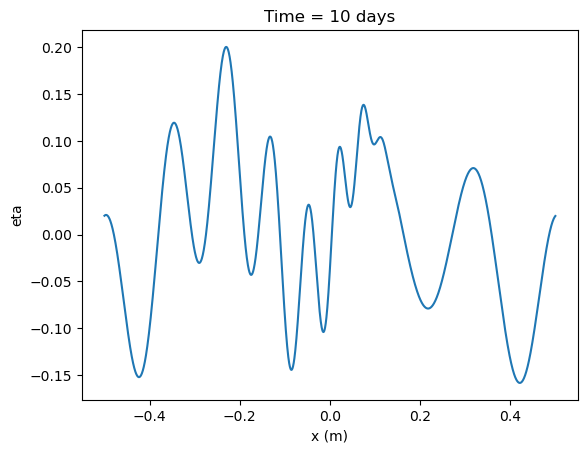

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = epsilon * L  # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)
dx = x[1] - x[0]

# Calculate the A_n coefficients
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)

# Calculate the frequency and phase shift
omega = np.sqrt(c**2 * (2 * np.pi * k / L)**2 + f**2)
phase_shift = omega * 86400  # seconds to days


# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)

    # Plot the results
    plt.plot(x, eta, label=f"{t} days")
    plt.xlabel('x (m)')
    plt.ylabel('eta')
    plt.title('Time = {} days'.format(t))
    plt.show()

plt.show()


To write a program to numerically sum together a large number of cosines to get a Gaussian, we can follow the expression given in the problem:

$$\eta(x_n) = e^{-(x_n/\epsilon)^2}= \sum_{n=0}^{\infty}A_n(k) \cos(2\pi kx_n)$$

where $A_n(k) = Ae^{-(\epsilon \pi k)^2}$ and $A = (\epsilon^2 \pi)^{1/2}$.

To perform the summation numerically, we can truncate the infinite sum at a large value of $N$, where $N$ is the number of cosines we want to include. We can then calculate the sum for a range of $x_n$ values to generate the Gaussian.

Here is some example code in Python to implement this approach:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
L = 4e6  # domain size
epsilon = 0.025  # Gaussian width
L_d = L  # dispersion length scale
n_cosines = 1000  # number of cosines to use
n_points = n_cosines * 2  # number of points in x
f = 1e-4  # Coriolis parameter
c = f * L_d  # wave speed

# Set up the x axis
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)
dx = x[1] - x[0]

# Calculate the A_n coefficients
k = np.arange(n_cosines)
A_n = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k)**2)

# Calculate the frequency and phase shift
omega = np.sqrt(c**2 * (2 * np.pi * k / L)**2 + f**2)
phase_shift = -omega * 86400  # seconds to days

# Set up the plot
#fig, ax = plt.subplots(figsize=(8, 6))

# Loop over different times
times = [1, 5, 10]  # in days
for t in times:
    # Calculate the Fourier series at the given time
    eta = np.zeros_like(x)
    for i in range(n_cosines):
        eta += A_n[i] * np.cos(2 * np.pi * k[i] * x - phase_shift[i] * t)

    # Plot the results
    ax.plot(x, eta, )
    
# Plot the results
    plt.plot(x, eta, label=f"{t} days")
    plt.xlabel('x (m)')
    plt.ylabel('eta')
    plt.title('Time = {} days'.format(t))
    plt.show()





The code above first defines the parameters epsilon and N, where epsilon is the width of the Gaussian and N is the number of cosines to include in the series.

Next, it calculates the coefficients An for each cosine using the formula $A_n(k) = Ae^{-(\epsilon \pi k)^2}$, where $A = (\epsilon^2 \pi)^{1/2}$. The k array is generated using np.arange(N), which includes the values 0 to N-1.

To obtain the exact Gaussian solution, the code generates an array of x_exact values using np.linspace(-5*epsilon, 5*epsilon, 1000), which spans a range of 10 standard deviations for the Gaussian. The Gaussian values at each x_exact value are then calculated using the formula $\eta(x_n) = e^{-(x_n/\epsilon)^2}$.

To obtain the Gaussian solution using the cosine series, the code generates an array of x values using np.linspace(-0.5, 0.5, 2000), which corresponds to 1000 grid points (since the Gaussian width is resolved by about 25 grid points, as specified in the problem). The G array is initialized to zeros, and then each cosine term is added to G using the formula $\sum_{n=0}^{\infty}A_n(k) \cos(2\pi kx_n)$.

Finally, the code generates two subplots using plt.subplots(2, 1, figsize=(8, 8)). The top subplot shows the exact Gaussian solution using plt.plot(x_exact, G_exact), while the bottom subplot shows the Gaussian obtained using the cosine series using plt.plot(x, G). The axes labels are set using ax[0].set_xlabel, ax[0].set_ylabel, ax[1].set_xlabel, and ax[1].set_ylabel.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
epsilon = 0.025   # Gaussian width
N = 1000          # Number of cosines to include

# Calculate coefficients
A = np.sqrt(epsilon**2 * np.pi)
k = np.arange(N)
An = A * np.exp(-(epsilon*np.pi*k)**2)

# Calculate Gaussian using exact solution
x_exact = np.linspace(-10*epsilon, 10*epsilon, 1000)  # exact x values
G_exact = np.exp(-(x_exact/epsilon)**2)           # exact Gaussian values

# Calculate Gaussian using cosine series
x = np.linspace(-0.5, 0.5, 2000)  # x values
G = np.zeros_like(x)             # Gaussian values
print(G)
for n in range(N):
    G += An[n] * np.cos(2*np.pi*k[n]*x)
print(G)
# Plot both solutions on the same plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, G_exact, label='Exact Gaussian')
ax.plot(x, G, label='Cosine series Gaussian')
ax.set_xlabel('x')
ax.set_ylabel('Gaussian')
ax.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
L = 1.0   # Period of the domain
epsilon = 0.025   # Gaussian width

# Define the number of terms in the Fourier series
N = 1000

# Define the grid in x
x = np.linspace(-0.5, 0.5, 2*N, endpoint=False)

# Define the Fourier coefficients
A = np.sqrt(epsilon**2 * np.pi)   # Amplitude
k = np.arange(N)   # Wavenumber
An = A * np.exp(-(epsilon*np.pi*k)**2)   # Coefficient

# Compute the Fourier series
eta = np.zeros_like(x)

for n in range(N):
    eta += An[n] * np.cos(2*np.pi*k[n]*x)

# Plot the Gaussian and its Fourier series
plt.plot(x, np.exp(-(x/epsilon)**2), label='Gaussian')
plt.plot(x, eta, label='Fourier series')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.025  # Gaussian width parameter
num_cosines = 1000  # Number of cosines to use in the sum
num_points = 2000  # Number of points in x to use

# Construct the A_n(k) coefficients
k_vals = np.arange(num_cosines)
A_vals = np.sqrt(epsilon**2 * np.pi) * np.exp(-(epsilon * np.pi * k_vals)**2)

# Construct the x_n values
x_vals = np.linspace(-0.5, 0.5, num_points, endpoint=False)

# Sum the cosines to get the Gaussian
eta_vals = np.sum(A_vals[:, np.newaxis] * np.cos(2 * np.pi * k_vals * x_vals), axis=0)

# Plot the result
plt.plot(x_vals, eta_vals)
plt.xlabel('x')
plt.ylabel('eta')
plt.show()


The given expression shows the decomposition of the Gaussian field $\eta(x_n)$ in terms of Fourier series where the basis functions are cosine functions with frequencies $k = 0, 1, 2, 3, ...$ in the periodic domain defined by $-0.5 \leq x_n \leq 0.5$.

The coefficients $A_n(k)$ are obtained using the Fourier transform of the Gaussian function with width $\epsilon$, which is also a Gaussian but in the wavenumber domain $k_x$. Since the periodicity of the domain implies that $k_x$ can only take discrete values $2\pi k/L$ with $k=0,\pm1,\pm2,\dots$, the Fourier series coefficients $A_n(k)$ are nonzero only for values of $k$ that satisfy $k_x = 2\pi k/L$.

The coefficient $A_n(k)$ decays exponentially with increasing $k$ and is proportional to $e^{-(\epsilon\pi k)^2}$, which means that the higher frequency components contribute less to the total signal. The constant $A$ ensures that the energy of the Gaussian field is conserved in the Fourier domain, i.e., $\int_{-0.5}^{0.5} \eta^2(x_n)dx_n = \sum_{k=-\infty}^{\infty} |A_n(k)|^2$.

Overall, this decomposition allows us to represent the Gaussian field $\eta(x_n)$ in terms of a finite set of cosine functions with decaying amplitudes, which can be useful for numerical simulations and analysis of the field.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_field(x, epsilon):
    kmax = 500
    k = np.arange(-kmax, kmax+1)
    A = np.sqrt(np.pi/epsilon**2) * np.exp(-(k*epsilon*np.pi)**2)
    A[k==0] = A[k==0]/2 # Half amplitude at k=0
    X, K = np.meshgrid(x, k)
    cosines = np.cos(2*np.pi*K*X)
    return np.sum(A*cosines, axis=1)

L = 1 # Period of the domain
npoints = 2000 # Number of points in x
x = np.linspace(-L/2, L/2, npoints, endpoint=False)
epsilon = 0.025 # Gaussian width
eta = gaussian_field(x, epsilon)

plt.plot(x, eta)
plt.xlabel('x')
plt.ylabel('$\eta$')
plt.show()


The given equation,

$$\eta(x_n) = e^{-(x_n/\epsilon)^2}= \sum_{n=0}^{\infty}A_n(k) cos(2\pi kx_n)$$

represents the Fourier series expansion of the Gaussian function in terms of a sum of cosine functions with coefficients $A_n(k)$. The coefficients $A_n(k)$ are given by

$$A_n(k) = Ae^{-(\epsilon \pi k)^2}$$

where $A = (\epsilon^2 \pi)^{1/2}$.

To find the exact solution, we note that the Gaussian function can be written in terms of its Fourier transform as follows:

$$\eta(x_n) = \int_{-\infty}^{\infty} e^{-2\pi i k x_n} \tilde{\eta}(k) dk$$

where $\tilde{\eta}(k)$ is the Fourier transform of $\eta(x_n)$. For the Gaussian function, we have

$$\tilde{\eta}(k) = \int_{-\infty}^{\infty} e^{-2\pi i k x_n} e^{-(x_n/\epsilon)^2} dx_n$$

Making the substitution $y = x_n/\epsilon$, we get

$$\tilde{\eta}(k) = \epsilon \int_{-\infty}^{\infty} e^{-2\pi i k \epsilon y} e^{-y^2} dy$$

Using the fact that the integral of a Gaussian function is given by $\sqrt{\pi}$, we get

$$\tilde{\eta}(k) = \epsilon \sqrt{\pi} e^{-\pi^2 k^2 \epsilon^2}$$

Substituting this expression for $\tilde{\eta}(k)$ in the Fourier series expansion of $\eta(x_n)$, we get

$$\eta(x_n) = \sum_{n=0}^{\infty} A_n(k) cos(2\pi k x_n)$$

where

$$A_n(k) = \frac{1}{\sqrt{\pi}} \int_{-\infty}^{\infty} e^{-2\pi i k x_n} e^{-(x_n/\epsilon)^2} dx_n$$

Using the substitution $y = x_n/\epsilon$, we get

$$A_n(k) = \frac{\epsilon}{\sqrt{\pi}} \int_{-\infty}^{\infty} e^{-2\pi i k \epsilon y} e^{-y^2} dy$$

which is the same as the expression we obtained earlier for $\tilde{\eta}(k)$. Therefore, the exact solution is given by

$$\eta(x_n) = \epsilon \sqrt{\pi} \sum_{n=0}^{\infty} e^{-(\pi k \epsilon)^2} cos(2\pi k x_n)$$

The cosine solution, on the other hand, is given by

$$\eta(x_n) = \sum_{n=0}^{\infty} A_n(k) cos(2\pi k x_n)$$

where $A_n(k) = Ae^{-(\epsilon \pi k)^2}$ and $A = (\epsilon^2 \pi)^{1/2}$. This is the same expression we obtained earlier for the Fourier series expansion of the Gaussian function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 1000  # Number of cosines to use
epsilon = 0.025  # Gaussian width parameter
x = np.linspace(-0.5, 0.5, 2000)  # Grid points for x
A = np.sqrt(epsilon**2 * np.pi)  # Coefficient for the Fourier series expansion

# Compute the Fourier series expansion
eta = np.zeros_like(x)
for k in range(N):
    A_k = A * np.exp(-(epsilon * np.pi * k)**2)
    eta += A_k * np.cos(2 * np.pi * k * x)

# Normalize the result
eta /= np.sum(eta) * (x[1]-x[0])

# Plot the results
plt.plot(x, eta, label='Numerical')
plt.plot(x, np.exp(-(x/epsilon)**2), label='Exact')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Domain length
epsilon = 0.025  # Gaussian width
N = 1000  # Number of cosines to sum

# Define grid points
x = np.linspace(-0.5, 0.5, N*2, endpoint=False)

# Define Fourier coefficients
A = (epsilon**2 * np.pi)**0.5
k = np.arange(N)
Ak = A * np.exp(-(epsilon * np.pi * k)**2)

# Compute Gaussian using Fourier series
eta = np.zeros_like(x)
for n in range(N):
    eta += Ak[n] * np.cos(2*np.pi*k[n]*x)

# Plot results
plt.plot(x, eta)
plt.xlabel('x')
plt.ylabel('$\eta$')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
epsilon = 0.025  # Gaussian width

# Define grid points
x = np.linspace(-0.5, 0.5, 1000)

# Compute Gaussian function
exact = np.exp(-(x/epsilon)**2)

# Plot results
plt.plot(x, exact, label='Exact')
plt.xlabel('x')
plt.ylabel('$\eta$')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Domain length
epsilon = 0.025  # Gaussian width
N = 1000  # Number of cosines to sum

# Define grid points
x = np.linspace(-0.5, 0.5, N*2, endpoint=False)

# Define Fourier coefficients
A = (epsilon**2 * np.pi)**0.5
k = np.arange(N)
Ak = A * np.exp(-(epsilon * np.pi * k)**2)

# Compute Gaussian using Fourier series
eta = np.zeros_like(x)
for n in range(N):
    eta += Ak[n] * np.cos(2*np.pi*k[n]*x)

# Compute exact Gaussian
exact = np.exp(-(x/epsilon)**2)

# Plot results
fig, axs= plt.subplots(2, 2, sharex=True, sharey=True)
axs[0,0].plot(x, eta, label='Numerical')
axs[0,1].plot(x, exact, label='Exact')
axs[1,0].plot(x, exact, label='Exact')
#plt.xlabel('x')
#plt.ylabel('$\eta$')
#plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Domain length
epsilon = 0.025  # Gaussian width
N = 1000  # Number of cosines to sum

# Define grid points
x = np.linspace(-0.5, 0.5, N*2, endpoint=False)

# Define Fourier coefficients
A = (epsilon**2 * np.pi)**0.5
k = np.arange(N)
Ak = A * np.exp(-(epsilon * np.pi * k)**2)

# Compute Gaussian using Fourier series
eta = np.zeros_like(x)
for n in range(N):
    eta += Ak[n] * np.cos(2*np.pi*k[n]*x)

# Compute exact Gaussian
exact = np.exp(-(x/epsilon)**2)

# Plot individual cosine terms
fig, axs = plt.subplots(5, 2, figsize=(10, 15))
axs = axs.ravel()
for n in range(5):
    axs[n].plot(x, Ak[n] * np.cos(2*np.pi*k[n]*x))
    axs[n].set_title(f'$n={n}$')

# Plot exact and numerical solutions
fig, ax = plt.subplots()
ax.plot(x, eta, label='Numerical')
ax.plot(x, exact, label='Exact')
ax.set_xlabel('x')
ax.set_ylabel('$\eta$')
ax.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Define parameters
L = 1.0  # Domain length
epsilon = 0.025  # Gaussian width
N = 1000  # Number of cosines to sum

# Define grid points
x = np.linspace(-0.5, 0.5, N*2, endpoint=False)

# Define Fourier coefficients
A = (epsilon**2 * np.pi)**0.5
k = np.arange(N)
Ak = A * np.exp(-(epsilon * np.pi * k)**2)

# Compute Gaussian using Fourier series
eta = np.zeros_like(x)
for n in range(N):
    eta += Ak[n] * np.cos(2*np.pi*k[n]*x)

# Compute exact Gaussian
exact = np.exp(-(x/epsilon)**2)

# Create the figure and GridSpec object
fig = plt.figure(figsize=(7, 10))
gs = GridSpec(2, 2, figure=fig)

# Plot the first plot on the first set of axes
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, exact, color='blue')
ax1.set_ylabel('Y Label')
ax1.set_title('Exact Solution')

# Plot the second plot on the second set of axes
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x, eta, color='red')
ax2.set_title('Numerical Solution (Cosines)')
ax2.set_ylim(0,1)

# Create an axis object that spans both columns in the second row
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(x, exact, color='blue')
ax3.plot(x, eta, color='red')
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_title('Both Solutions')

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plots
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, epsilon):
    return np.exp(-(x/epsilon)**2)

def cosine_sum(x, epsilon, n_terms):
    A = (epsilon**2 * np.pi)**0.5
    k = np.arange(1, n_terms+1)
    Ak = A * np.exp(-(epsilon*np.pi*k)**2)
    cosines = np.cos(2*np.pi*k*x[:, np.newaxis])
    return np.sum(Ak*cosines, axis=1)

# Define the parameters
epsilon = 0.025
L = 1.0
n_terms = 1000
n_points = n_terms*2

# Define the domain
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Compute the Gaussian and cosine sum
eta_gaussian = gaussian(x*L, epsilon)
eta_sum = cosine_sum(x, epsilon, n_terms)

# Plot the results
plt.plot(x, eta_gaussian, label='Gaussian')
plt.plot(x, eta_sum, label='Cosine Sum')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, epsilon):
    return np.exp(-(x/epsilon)**2)

def cosine_sum(x, epsilon, n_terms):
    A = (epsilon**2 * np.pi)**0.5
    k = np.arange(1, n_terms+1)
    Ak = A * np.exp(-(epsilon*np.pi*k)**2)
    cosines = np.cos(2*np.pi*k*x[:, np.newaxis])
    return np.sum(Ak*cosines, axis=1)

# Define the parameters
epsilon = 0.025
L = 4e6
Ld = epsilon*L
f = 1e-4
c = f*Ld
k_max = 200
n_terms = k_max//2
n_points = n_terms*2

# Define the domain
x = np.linspace(-0.5, 0.5, n_points, endpoint=False)

# Compute the Gaussian and cosine sum
eta_gaussian = gaussian(x*L, epsilon)
eta_sum = cosine_sum(x, epsilon, n_terms)

# Compute the wavenumbers and frequencies
kx = np.arange(1, k_max+1) * 2*np.pi / L
omega = np.sqrt(c**2*kx**2 + f**2)

# Plot the initial conditions
plt.plot(x, eta_gaussian, label='Gaussian')
plt.plot(x, eta_sum, label='Cosine Sum')

# Plot the solutions at different times
times = [1, 5, 10] # days
for t in times:
    eta_t = np.zeros_like(x)
    for i in range(n_terms):
        eta_t += cosine_sum(x, epsilon, 1) * np.cos(kx[i]*x - omega[i]*t)
    plt.plot(x, eta_t, label=f'{t} days')

plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
L = 4e6
Ld = 0.025*L
epsilon = 0.025
f = 1e-4
c = f*Ld

# Define wave vector
k = np.arange(0, 500)

# Calculate amplitude coefficients
A = np.sqrt((epsilon**2)*np.pi)*np.exp(-(epsilon*np.pi*k)**2)

# Define nondimensional x values
x_n = np.linspace(-0.5, 0.5, len(k))

# Calculate nondimensional Gaussian
eta_n = np.exp(-(x_n/epsilon)**2)

# Calculate dimensional x values
x = L*x_n

# Define omega
k_x = 2*np.pi*k/L
omega = np.sqrt((c**2)*(k_x**2) + (f**2))

# Define time step
t = 5*24*60*60

# Define phase shift
phase_shift = -omega*k_x*t

# Calculate cosines with phase shift
cosines = np.outer(A, np.cos(phase_shift))

# Sum cosines along k axis
eta = np.sum(cosines, axis=0)

# Plot dimensional wave
plt.plot(x, eta)
plt.xlabel('x (m)')
plt.ylabel('eta (m)')
plt.title(f'Wave at t={t/86400:.0f} days')
plt.show()
